# Setup

In [66]:
import sys
sys.path.insert(
    0, '/home/student.unimelb.edu.au/shorte1/Documents/TINT')

In [67]:
import sys
sys.path.insert(0, '/home/563/esh563/TINT')

In [68]:
# Core
import datetime
import os
import glob
import tempfile
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

# Debugging
import pdb, traceback
# %load_ext line_profiler

# Radar Tools
import pyart
import tint
# import tint.animate
# from tint.visualisation import animate

import CPOL_func as cf
import caine_func as caf
import analysis

# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport tint.visualisation.figures
%aimport tint.visualisation.animate
%aimport tint.visualisation.horizontal_helpers
%aimport tint.visualisation.vertical_helpers
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport tint.steiner
%aimport tint.matching
%aimport tint.rain
%aimport tint.cells
%aimport tint.tracks_helpers
%aimport tint.process_ERA5
%aimport tint.process_WRF

%pdb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned OFF


In [81]:
base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'

In [8]:
base_dir = '/g/data/hj10/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/'
save_dir = '/home/563/esh563/TINT_tracks/'
fig_dir = '/home/563/esh563/TINT_figures/'
ERA5_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/'

# Create Tracks

In [70]:
b_path = '/home/student.unimelb.edu.au/shorte1/Documents/'
b_path += 'CPOL_analysis/circ_b_ind_set.pkl'
with open(b_path, 'rb') as f:
    b_ind_set = pickle.load(f)

In [82]:
start = np.datetime64('2022-03-01T00:00:00')
end = np.datetime64('2022-05-01T00:00:00')
datetimes = np.arange(start, end, np.timedelta64(10,'m'))

micro_physics = 'ACCESS'

tracks_obj  = tint.Tracks(params={
    'AMBIENT': 'ACCESS', 'AMBIENT_BASE_DIR': None,
    'GS_ALT': 0,
    'LEVELS': np.array(
        [[0, 0.5], [1, 1.5]]),
    'WIND_LEVELS': np.array(
        [[500, 3500], [500, 20000]]),
    'FIELD_THRESH': ['convective', 15],
    'MIN_SIZE': [80, 800],
    'ISO_THRESH': [10, 10],
    'INPUT_TYPE': 'ACCESS_DATETIMES'})

grids = (
    date for date in datetimes)

tracks_obj.get_tracks(grids, b_path=b_path)

Creating a reference grid.


/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/pyart/map/gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


Updating ACCESS-C pseudo pyart reflectivity grid.
Getting ACCESS-G ambient winds.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 0.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 9.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 10.
Updating ACCESS-C pseudo pyart reflectivity grid.
No object

No objects found in scan 118.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 119.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 120.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 121.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 122.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 123.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 124.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 125.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 126.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 127.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 128.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 129.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 130.
Updating A

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 226.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 227.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 228.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 229.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 230.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 231.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 232.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 233.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 234.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 235.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 236.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 237.
Updating ACCESS-C pseudo pyart reflectiv

Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 330.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 331.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 332.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 333.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 334.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 335.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 336.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 337.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 338.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 339.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 340.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 341.
Updating ACCESS-C pseudo pyart reflectivity gri

No objects found in scan 473.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 474.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 475.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 476.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 477.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 478.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 479.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 480.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 481.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 482.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 483.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 484.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 485.
Updating A

Getting ACCESS-G ambient winds.
Writing tracks for scan 600.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 601.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 602.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 603.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 604.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 605.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 606.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 607.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 608.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 609.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 610.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 611.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-

No objects found in scan 703.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 704.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 705.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 706.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 707.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 708.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 709.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 710.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 711.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 712.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 713.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 714.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 715.
Updating A

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 820.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 821.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 822.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 823.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 824.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 825.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 826.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 827.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 828.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 829.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 830.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 831.
Updating ACCESS-C pseudo pyart reflectiv

Writing tracks for scan 922.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 923.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 924.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 925.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 926.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 927.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 928.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 929.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 930.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 931.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 932.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 933.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 934.
Updating ACCESS-C pseud

No objects found in scan 1046.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1047.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1048.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 1049.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1050.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1051.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1052.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1053.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1054.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1055.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1056.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1057.
Updating ACCESS-C pseu

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1151.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1152.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1153.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1154.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1155.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1156.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1157.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1158.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1159.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1160.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1161.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1162.
Updating ACCESS-C pseudo pya

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1267.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1268.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1269.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1270.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1271.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1272.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1273.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1274.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1275.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1276.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1277.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1278.
Updating ACCESS-C pseudo pya

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1398.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1399.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1400.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1401.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1402.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1403.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1404.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1405.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1406.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1407.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1408.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1409.
Updating ACCESS-C pseudo pya

No objects found in scan 1503.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1504.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1505.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1506.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1507.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1508.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1509.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1510.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1511.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 1512.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1513.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1514.
Updating ACCESS-

No objects found in scan 1621.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1622.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1623.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1624.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1625.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1626.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1627.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1628.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1629.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1630.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1631.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1632.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 163

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1727.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1728.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1729.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1730.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1731.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1732.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1733.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1734.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1735.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1736.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1737.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1738.
Updating ACCESS-C pseudo pya

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1841.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1842.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1843.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1844.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1845.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1846.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1847.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1848.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1849.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1850.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1851.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 1852.
Updating ACCESS-C pseudo pya

Writing tracks for scan 1942.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 1943.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1944.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1945.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1946.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1947.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1948.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1949.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1950.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1951.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1952.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 1953.
Updating ACCESS-C pseudo 

No objects found in scan 2042.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2043.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2044.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2045.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2046.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2047.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2048.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2049.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2050.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 2051.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2052.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2053.
Updating ACCESS-C pseu

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2159.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2160.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2161.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2162.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2163.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2164.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2165.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2166.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2167.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2168.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2169.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2170.
Updating ACCESS-C pseudo pya

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2276.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2277.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2278.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2279.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2280.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2281.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2282.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2283.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2284.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2285.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2286.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2287.
Updating ACCESS-C pseudo pya

No objects found in scan 2417.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2418.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2419.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2420.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2421.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2422.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2423.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2424.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2425.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2426.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2427.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2428.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 242

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2544.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2545.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2546.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2547.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2548.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2549.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2550.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2551.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2552.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2553.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2554.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2555.
Updating ACCESS-C pseudo pya

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2646.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2647.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2648.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2649.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2650.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2651.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2652.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2653.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2654.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2655.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2656.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2657.
Updating ACCESS-C pseudo pya

Writing tracks for scan 2749.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 2750.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2751.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2752.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2753.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2754.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2755.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2756.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 2757.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2758.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2759.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2760.
Updating ACCESS-C pseu

No objects found in scan 2850.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2851.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2852.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2853.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2854.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2855.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2856.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2857.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Sk

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2948.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2949.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2950.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2951.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2952.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2953.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2954.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2955.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2956.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2957.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2958.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 2959.
Updating ACCESS-C pseudo pya

Writing tracks for scan 3047.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3048.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3049.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3050.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3051.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3052.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3053.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3054.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3055.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3056.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3057.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3058.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3059.
Updating A

No objects found in scan 3164.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3165.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3166.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3167.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3168.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3169.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3170.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3171.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3172.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3173.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3174.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 3175.
Updating ACCESS-C pseudo

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3283.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3284.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3285.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3286.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3287.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3288.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3289.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3290.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3291.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3292.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3293.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3294.
Updating ACCESS-C pseudo pya

Writing tracks for scan 3384.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3385.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3386.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3387.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3388.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3389.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3390.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 3391.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3392.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3393.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3394.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3395.
Updating ACCESS-C pseud

No objects found in scan 3517.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3518.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3519.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3520.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3521.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3522.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3523.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3524.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3525.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3526.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3527.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3528.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 352

Writing tracks for scan 3618.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3619.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3620.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3621.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3622.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3623.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3624.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3625.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3626.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3627.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3628.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3629.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3630.
Updating A

Getting ACCESS-G ambient winds.
Writing tracks for scan 3715.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3716.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3717.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3718.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3719.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3720.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3721.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3722.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3723.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3724.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3725.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3726.
Updating ACCESS-C pseudo pyart reflectivity gri

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3847.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3848.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3849.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3850.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3851.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3852.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3853.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3854.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3855.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3856.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3857.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3858.
Updating ACCESS-C pseudo pya

No objects found in scan 3956.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3957.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3958.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3959.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3960.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3961.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3962.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3963.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3964.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 3965.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 3966.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 3967.
Updating ACCESS

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4065.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4066.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4067.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4068.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4069.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4070.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4071.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4072.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4073.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4074.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4075.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4076.
Updating ACCESS-C pseudo pya

Getting ACCESS-G ambient winds.
Writing tracks for scan 4176.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4177.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4178.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4179.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4180.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4181.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4182.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4183.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4184.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4185.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4186.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4187.
Updating ACCESS-C pseudo pyart reflectivity grid.
No o

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4279.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4280.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4281.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4282.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4283.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4284.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4285.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4286.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4287.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4288.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4289.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4290.
Updating ACCESS-C pseudo pya

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4380.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4381.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4382.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4383.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4384.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4385.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4386.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4387.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4388.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4389.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4390.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4391.
Updating ACCESS-C pseudo pya

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4497.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4498.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4499.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4500.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4501.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4502.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4503.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4504.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4505.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4506.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4507.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4508.
Updating ACCESS-C pseudo pya

Writing tracks for scan 4598.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4599.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4600.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4601.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4602.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 4603.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4604.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4605.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4606.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4607.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4608.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4609.
Updating ACCESS-C pseudo 

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4711.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4712.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4713.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4714.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4715.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4716.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4717.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4718.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 4719.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4720.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 4721.
Updating ACCESS-C pseudo pyart reflectivity gri

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4812.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4813.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4814.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4815.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4816.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4817.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4818.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4819.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4820.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4821.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4822.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4823.
Updating ACCESS-C pseudo pya

No objects found in scan 4926.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4927.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4928.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4929.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4930.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4931.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4932.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4933.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4934.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4935.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4936.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 4937.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 493

Getting ACCESS-G ambient winds.
Writing tracks for scan 5027.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5028.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5029.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5030.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5031.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5032.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5033.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5034.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 5035.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5036.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5037.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for sc

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5143.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5144.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5145.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5146.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5147.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5148.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5149.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5150.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5151.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5152.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5153.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5154.
Updating ACCESS-C pseudo pya

No objects found in scan 5262.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5263.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5264.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5265.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5266.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5267.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5268.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5269.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5270.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5271.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5272.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5273.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 527

No objects found in scan 5368.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5369.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5370.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5371.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5372.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5373.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5374.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5375.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5376.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5377.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5378.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5379.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 538

Writing tracks for scan 5471.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5472.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5473.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5474.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5475.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5476.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5477.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5478.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5479.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5480.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5481.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5482.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5483.
Up

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5575.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5576.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5577.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5578.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5579.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5580.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5581.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5582.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5583.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5584.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5585.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5586.
Updating ACCESS-C pseudo pya

Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Time discontinuity at 2022-04-09 07:30:00.
No objects found in scan 5620.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5621.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5622.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5623.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5624.
Up

No objects found in scan 5723.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5724.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5725.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5726.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5727.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5728.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5729.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5730.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5731.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5732.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5733.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5734.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 573

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5836.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5837.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5838.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5839.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5840.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5841.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5842.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5843.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5844.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5845.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5846.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 5847.
Updating ACCESS-C pseudo pya

Getting ACCESS-G ambient winds.
Writing tracks for scan 5938.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5939.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5940.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5941.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5942.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5943.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5944.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5945.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5946.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5947.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5948.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 5949.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing 

Writing tracks for scan 6039.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6040.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6041.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6042.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6043.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6044.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 6045.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6046.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6047.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6048.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6049.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6050.
Updating ACCESS-C pseudo 

No objects found in scan 6169.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6170.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6171.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6172.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6173.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6174.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6175.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6176.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6177.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6178.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6179.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6180.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 618

Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6270.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6271.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6272.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 6273.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6274.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6275.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6276.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6277.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6278.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6279.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6280.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6281.
Updating ACCESS-C pseudo pyart r

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6407.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6408.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6409.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6410.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6411.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6412.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6413.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6414.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6415.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6416.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6417.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6418.
Updating ACCESS-C pseudo pya

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6513.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6514.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6515.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6516.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6517.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6518.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCESS-C pseudo pyart reflectivity grid.
Skipping erroneous grid.
Updating ACCES

No objects found in scan 6631.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6632.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6633.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6634.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6635.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6636.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6637.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6638.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6639.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6640.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6641.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6642.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 664

No objects found in scan 6738.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6739.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6740.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6741.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6742.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6743.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6744.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6745.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6746.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6747.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6748.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6749.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 675

No objects found in scan 6870.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6871.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6872.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6873.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6874.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6875.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6876.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6877.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6878.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6879.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6880.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6881.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 688

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6996.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6997.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6998.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 6999.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7000.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7001.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7002.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7003.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7004.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7005.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7006.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7007.
Updating ACCESS-C pseudo pya

No objects found in scan 7114.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7115.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7116.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7117.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7118.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7119.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7120.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7121.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7122.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7123.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7124.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7125.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 712

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7220.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7221.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7222.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7223.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7224.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7225.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7226.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7227.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7228.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7229.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7230.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7231.
Updating ACCESS-C pseudo pya

No objects found in scan 7340.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7341.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7342.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7343.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7344.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7345.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7346.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7347.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7348.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7349.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7350.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7351.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 735

No objects found in scan 7423.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7424.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7425.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7426.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7427.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7428.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7429.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7430.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7431.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7432.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7433.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7434.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 743

No objects found in scan 7525.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7526.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7527.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7528.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7529.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7530.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7531.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7532.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7533.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7534.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7535.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7536.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 753

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7629.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7630.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7631.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7632.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7633.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7634.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7635.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7636.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7637.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7638.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7639.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7640.
Updating ACCESS-C pseudo pya

No objects found in scan 7752.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7753.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7754.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7755.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7756.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7757.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7758.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7759.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7760.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7761.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7762.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7763.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 776

No objects found in scan 7887.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7888.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7889.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7890.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7891.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7892.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7893.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7894.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7895.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7896.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7897.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 7898.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 789

No objects found in scan 8001.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8002.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8003.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8004.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8005.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8006.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8007.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8008.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8009.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8010.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8011.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8012.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 801

Getting ACCESS-G ambient winds.
Writing tracks for scan 8109.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8110.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8111.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8112.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8113.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8114.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8115.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8116.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8117.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8118.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8119.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8120.
Updating ACCESS-C pseudo pyart reflectivity grid.
No 

No objects found in scan 8232.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8233.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8234.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8235.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8236.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8237.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8238.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 8239.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8240.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 8241.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8242.
Updating ACCESS-C pseudo pyart re

Writing tracks for scan 8331.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8332.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8333.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8334.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8335.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8336.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8337.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8338.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8339.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8340.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8341.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8342.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8343.
Updating

Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8454.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 8455.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8456.
Updating ACCESS-C pseudo pyart reflectivity grid.
Updating ACCESS-G ambient winds.
Getting ACCESS-G ambient winds.
Writing tracks for scan 8457.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8458.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8459.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8460.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8461.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8462.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for scan 8463.
Updating ACCESS-C pseudo pyart reflectivity grid.
Writing tracks for 

No objects found in scan 8566.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8567.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8568.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8569.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8570.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8571.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8572.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8573.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8574.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8575.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8576.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 8577.
Updating ACCESS-C pseudo pyart reflectivity grid.
No objects found in scan 857

In [13]:
current_time = str(datetime.datetime.now())[0:-7]
current_time = current_time.replace(" ", "_").replace(":", "_")
current_time = current_time.replace("-", "")
out_file_name = save_dir + 'ACCESS_test.pkl'.format(
    micro_physics, current_time)
with open(out_file_name, 'wb') as f:
    pickle.dump(tracks_obj, f)

In [73]:
tracks_obj = tint.objects.classify_tracks(tracks_obj)
tracks_obj = tint.objects.get_exclusion_categories(tracks_obj)

In [74]:
exclusions = [
    'small_area', 'large_area', 'intersect_border', 
    'intersect_border_convective', 'duration_cond', 
    'small_velocity', 'small_offset']

excluded = tracks_obj.exclusions[exclusions]
excluded = excluded.xs(0, level='level')
excluded = np.any(excluded, 1)
# excluded = excluded.where(excluded==False).dropna()
# len(excluded)/3

included = np.logical_not(excluded)
included = included.where(included==True).dropna()

In [23]:
tracks_obj.exclusions[exclusions].loc[757]

small_area  large_area  intersect_border  \
time                uid level                                             
2022-03-06 06:10:00 15  0           False       False              True   
                        1           False       False              True   
                    16  0           False       False             False   
                        1           False       False             False   

                               intersect_border_convective  duration_cond  \
time                uid level                                               
2022-03-06 06:10:00 15  0                             True           True   
                        1                             True           True   
                    16  0                            False          False   
                        1                            False          False   

                               small_velocity  small_offset  
time                uid level                                
2022-03-06 06:10:00 15  0               False         False  
                        1               False         False  
                    16  0               False         False  
                        1               False         False

In [80]:
included

scan  time                 uid
7     2022-03-06 06:10:00  0      True
8     2022-03-06 06:20:00  0      True
9     2022-03-06 06:30:00  0      True
10    2022-03-06 06:40:00  0      True
11    2022-03-06 06:50:00  0      True
12    2022-03-06 07:00:00  0      True
14    2022-03-06 07:20:00  0      True
dtype: object

In [33]:
with open(save_dir + 'ACCESS_test.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

In [78]:
plot_datetime = np.datetime64('2022-03-06T06:50:00')
ACCESS_refl, grid = tint.process_ACCESS.init_ACCESS_C(plot_datetime, tracks_obj.reference_grid, gadi=False)

Missing times from ACCESS-C reflectivity.


Generating figure for 2022-03-06T06:50.


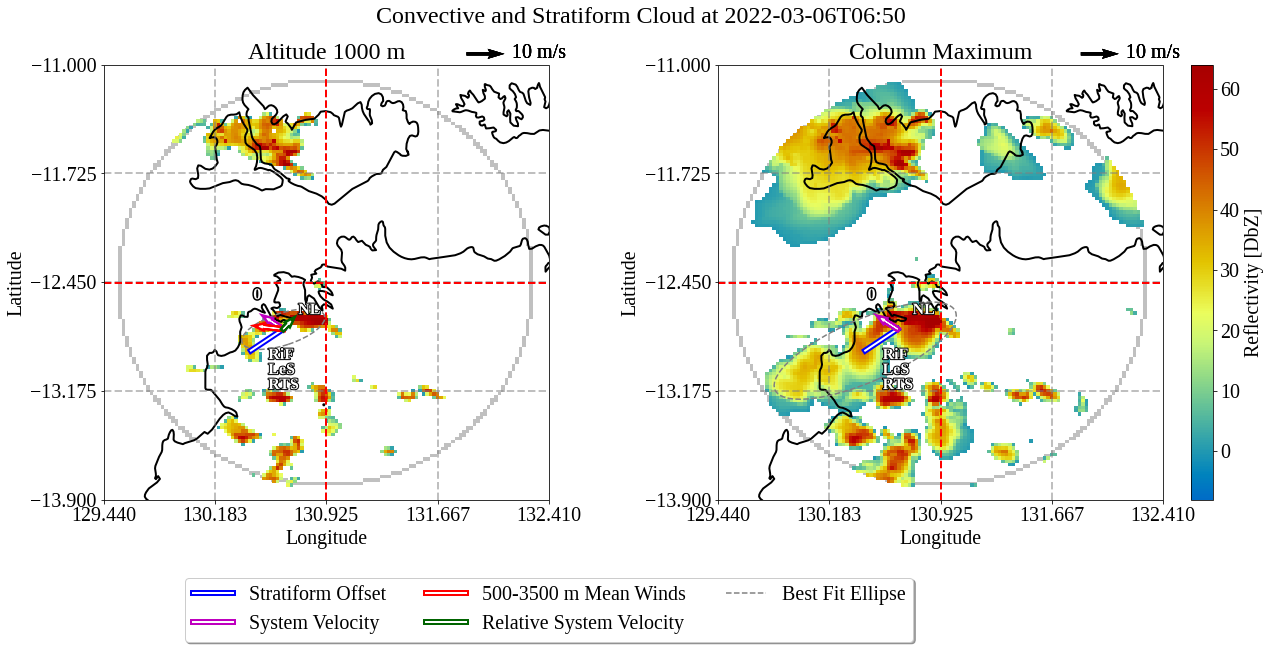

In [79]:
# filename = filenames[12]
# grid = pyart.io.read_grid(filename, include_fields=['reflectivity'])

# ACCESS_refl = tint.process_ACCESS.

current_time = str(datetime.datetime.now())[0:-7]
current_time = current_time.replace(" ", "_").replace(":", "_")
current_time = current_time.replace("-", "")

params = {
    'uid_ind': None, 'line_coords': False, 'center_cell': False,
    'cell_ind': 10, 'winds': False,
    'crosshair': True, 'fontsize': 20, 'colorbar_flag': True,
    'leg_loc': 2, 'label_type': 'velocities',
    'system_winds': ['shift', 'ambient_mean', 'relative'],
    'boundary': True, 'exclude': True}

tint.visualisation.figures.two_level(
    tracks_obj, grid, params=params, alt1=0, alt2=1)
plt.savefig(
    fig_dir + '/test_{}.png'.format(current_time), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')